# Website Checker
Checking, Is the Website is **Phishing Website** or **Not**.
## Importing Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

## Importing Dataset

In [11]:
data = pd.read_csv('data.csv')

In [12]:
data.head(10)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,0,0,1,-1,-1,-1,0,0,0,1,1,-1,1,-1,1,1,0,0,0,0,0,-1,1,-1,-1,0,1,1,1
1,0,1,0,0,0,-1,0,1,0,0,0,1,1,0,-1,-1,0,0,0,0,0,0,0,-1,1,0,-1,0,1,0,1
2,0,0,0,0,0,-1,-1,-1,0,0,0,1,1,0,-1,-1,1,1,0,0,0,0,0,0,1,1,-1,0,0,1,1
3,0,0,0,0,0,-1,-1,-1,1,0,0,1,-1,0,0,-1,0,0,0,0,0,0,0,-1,1,1,-1,0,-1,0,1
4,0,0,1,0,0,-1,1,1,0,0,0,0,1,0,0,-1,0,0,0,1,0,1,0,-1,1,0,-1,0,1,0,0
5,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0,-1,1,1,0,0,0,0,0,0,0,1,0,0,-1,1,0
6,0,-1,0,0,0,-1,-1,1,-1,1,0,1,1,0,-1,-1,1,1,0,1,0,1,1,1,1,1,1,0,0,1,0
7,0,-1,0,0,0,1,1,1,-1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,1,0,-1,-1,0,-1,1,0
8,0,0,0,0,0,0,-1,1,-1,0,0,0,1,0,1,-1,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0
9,0,0,0,0,0,0,0,0,1,0,0,0,-1,-1,-1,-1,1,1,0,0,0,0,0,0,1,1,-1,0,1,1,1


## 1. Exploratory Data Analysis (EDA)

In [7]:
data.shape

(2456, 31)

In [8]:
columns = data.columns
print(columns)

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')


### Checking Missing Value - Columnwise
Here, our Dataset **does not have any missing value**. 

In [ ]:
data.isnull().sum()

### Plotting Histogram For Checking Data Distribution
Here, According to the Histogram, all the columns are **discreate variable columns**.  

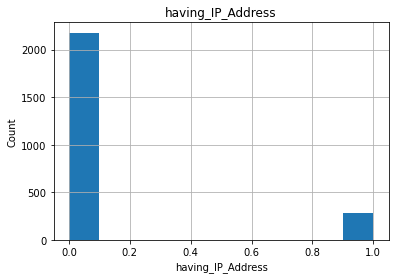

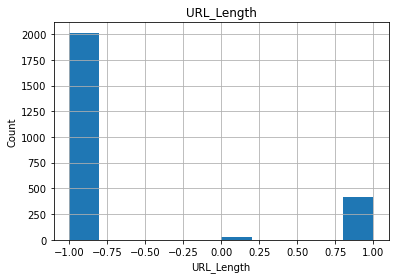

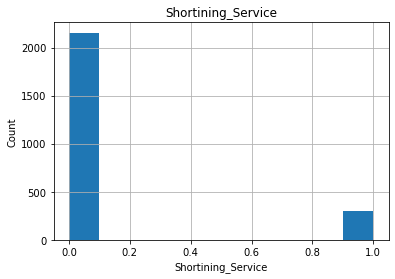

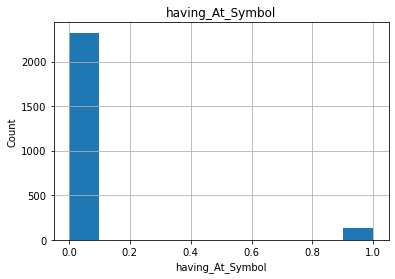

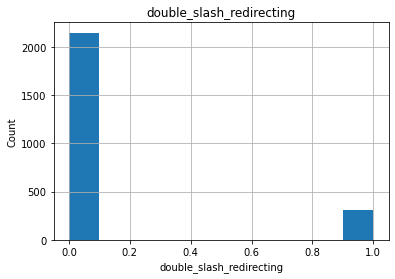

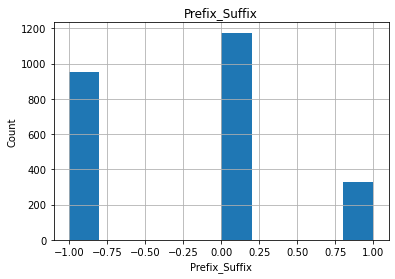

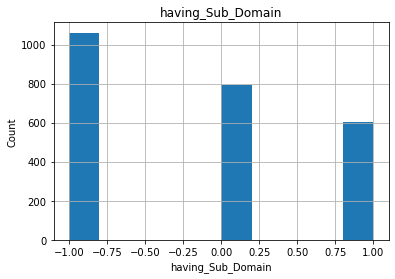

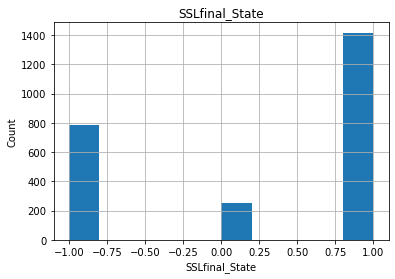

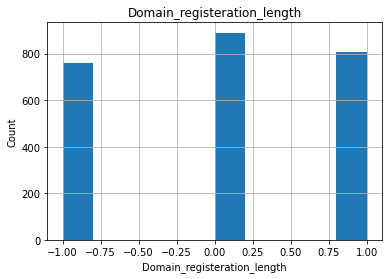

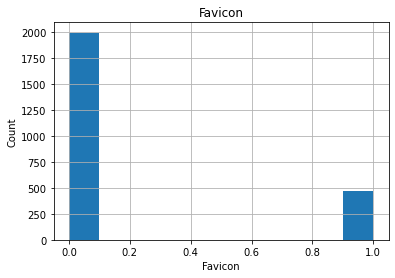

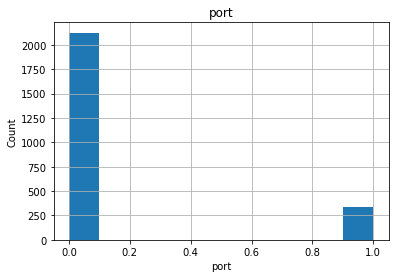

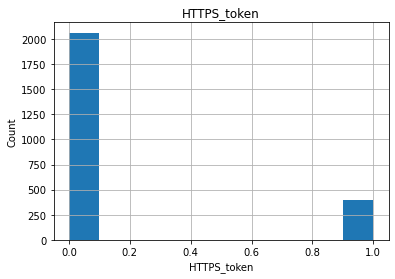

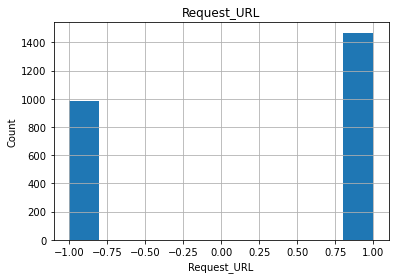

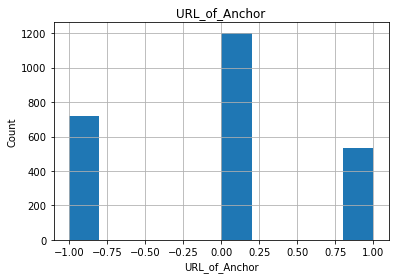

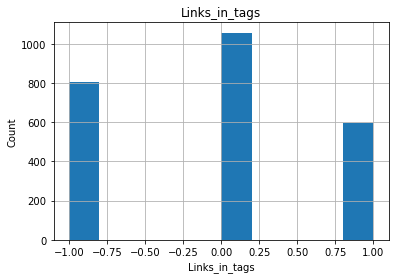

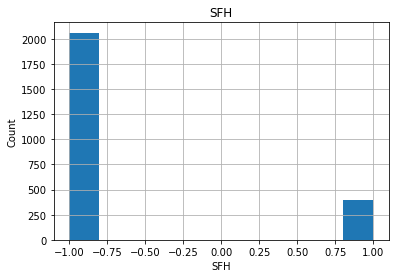

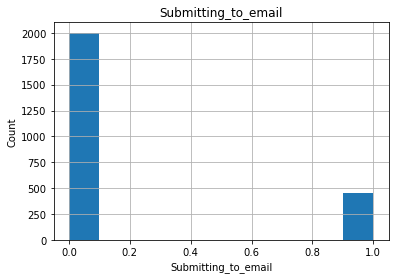

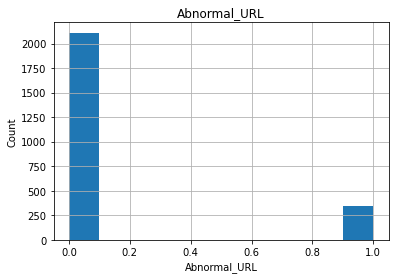

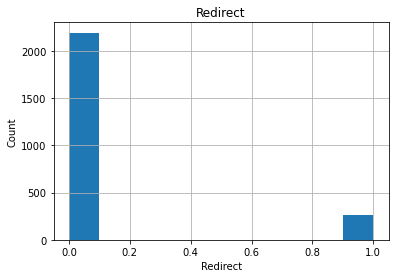

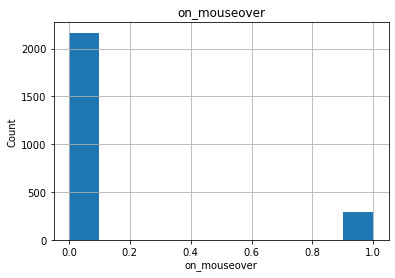

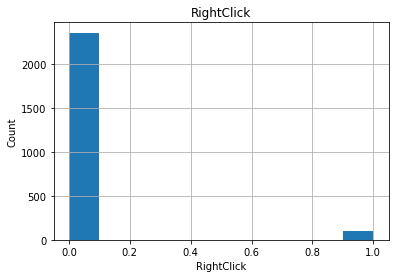

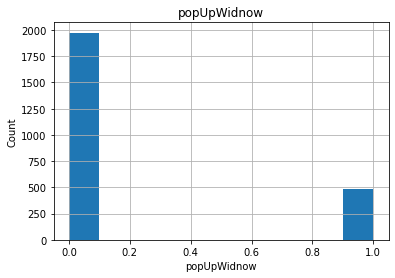

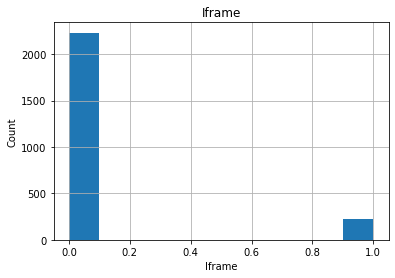

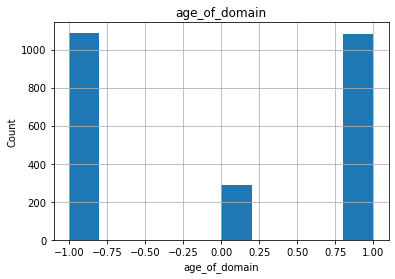

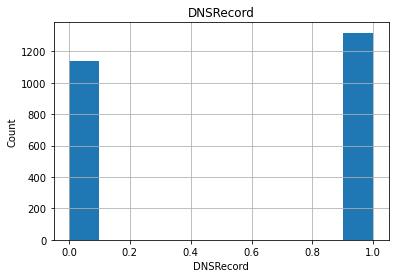

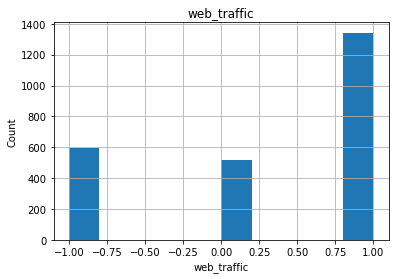

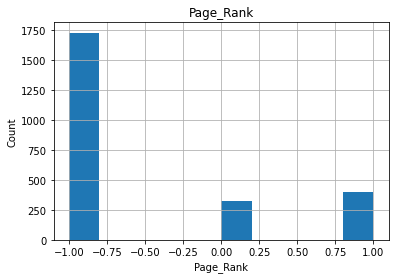

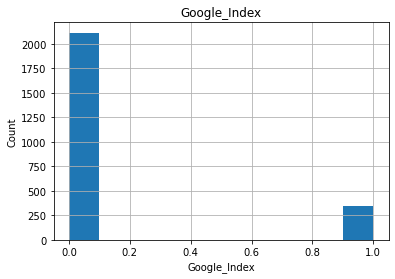

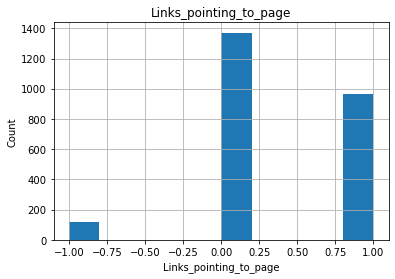

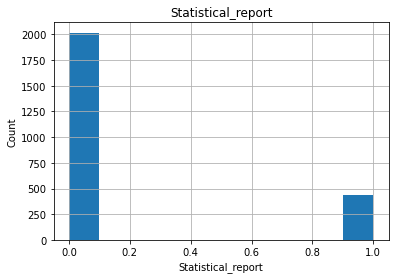

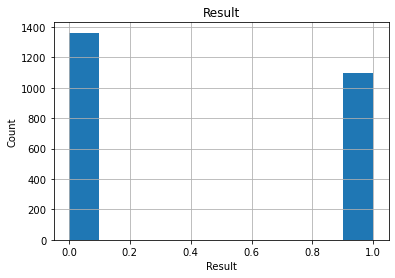

In [10]:
for col in columns:
    data[col].hist(bins=10)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(col)
    plt.show()

### Plotting Bar chart to get the frequency of the elements or labels columnwise

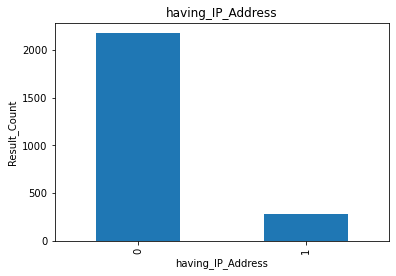

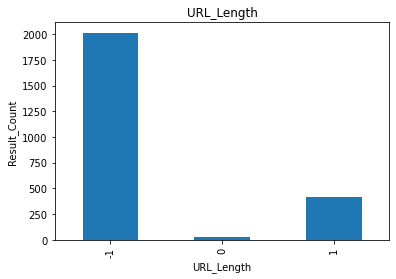

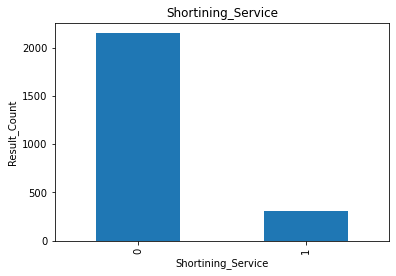

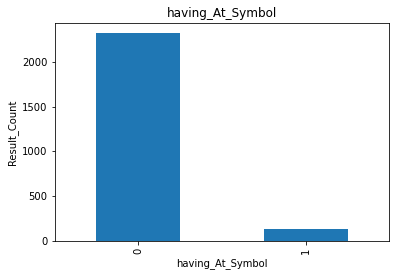

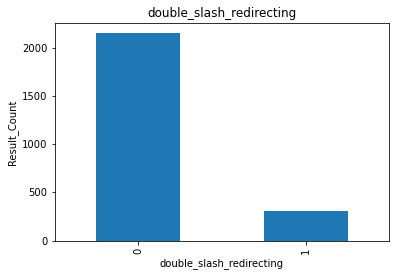

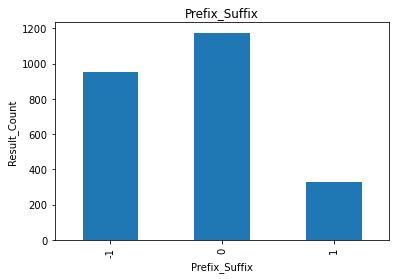

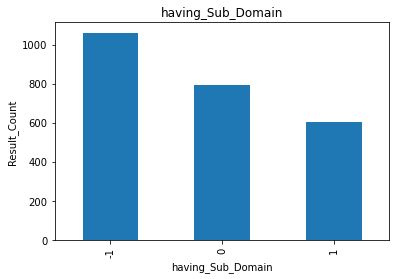

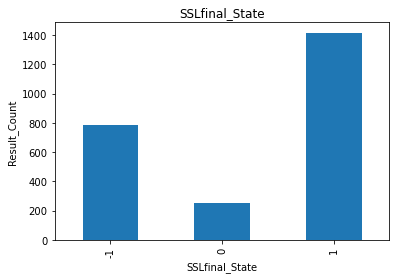

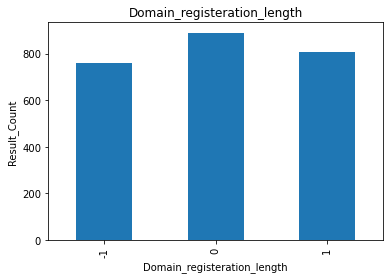

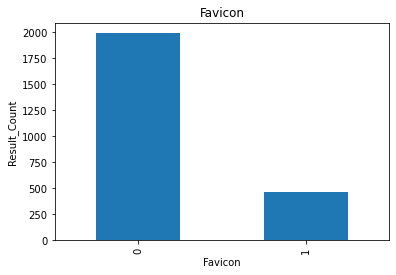

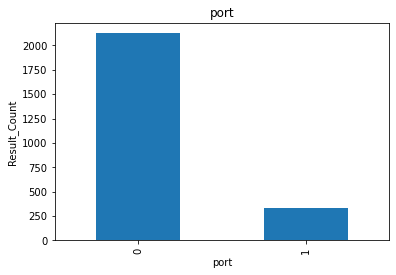

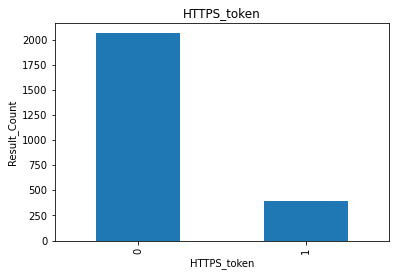

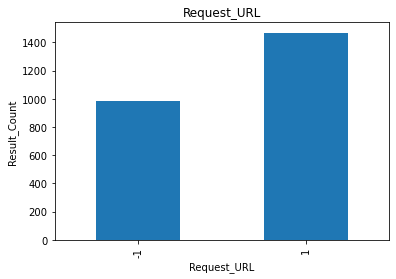

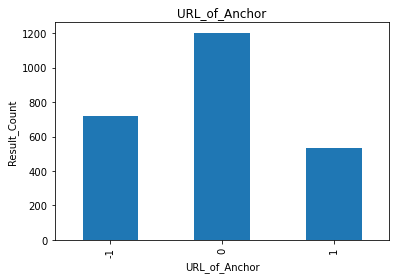

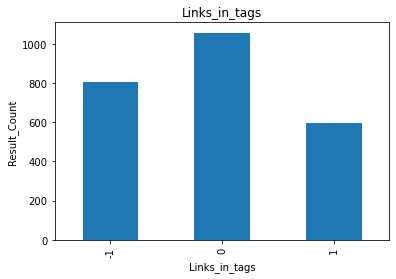

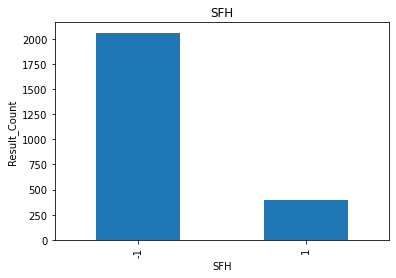

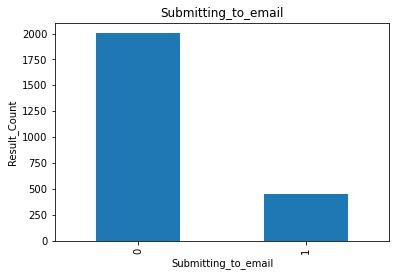

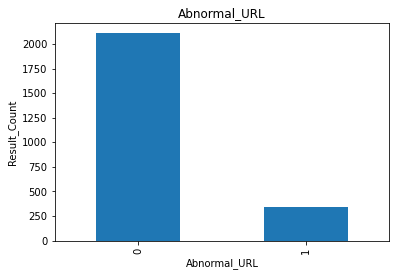

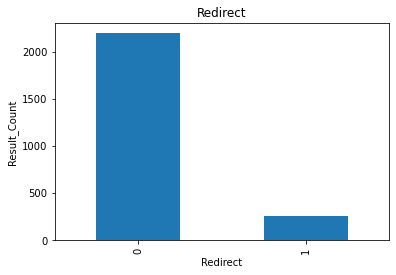

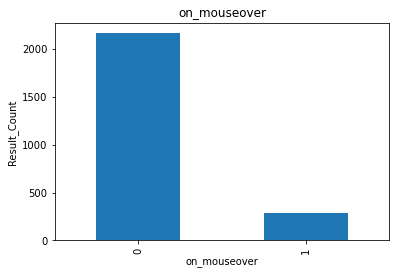

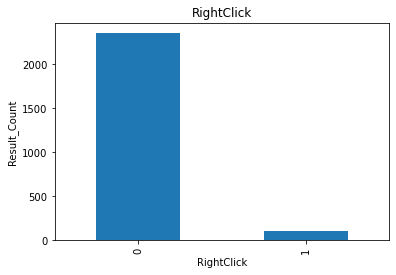

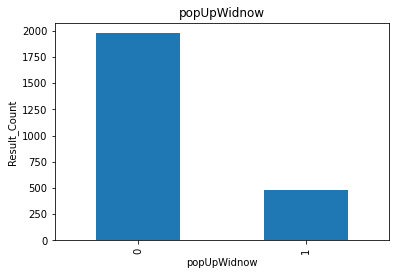

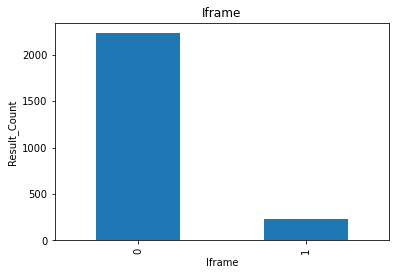

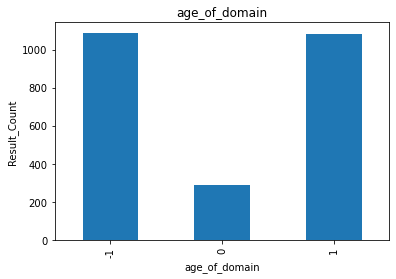

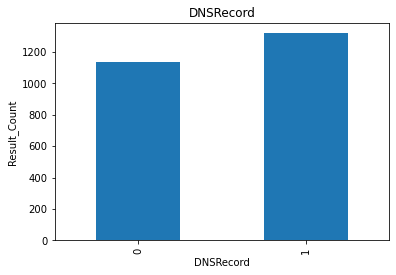

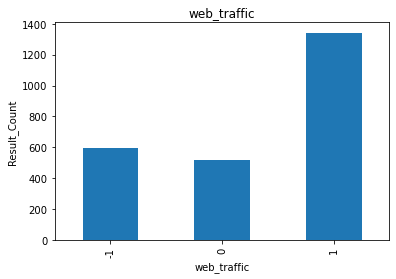

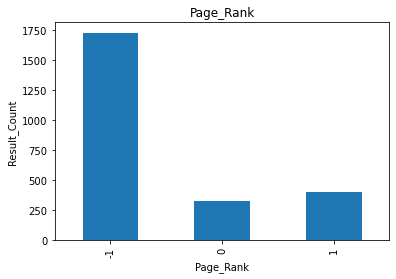

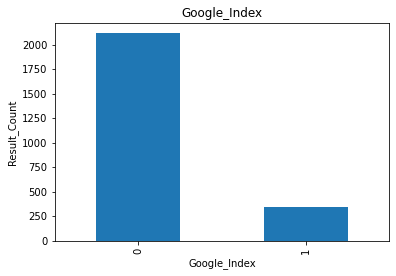

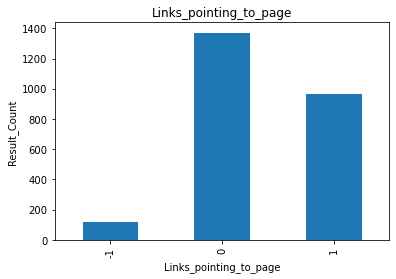

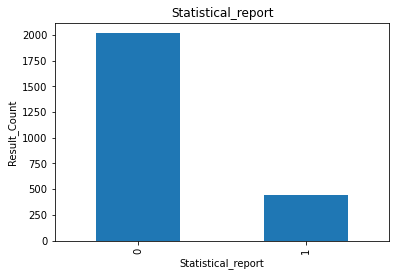

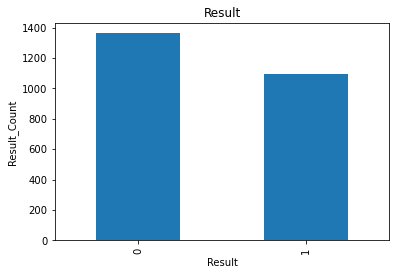

In [15]:
for col in columns:
    data.groupby(col)['Result'].count().plot.bar()
    plt.xlabel(col)
    plt.ylabel('Result_Count')
    plt.title(col)
    plt.show()

## 2. Feature Engineering

### Checking if our data is unbalanced or not
Here, According to the **code** below and **Bar chart**, it is clear that our **"Result"** column, which is our output column, is **not unbalanced**. As it does not have drastic difference in Result column's labels 
(0 & 1).

In [13]:
from collections import Counter
print(Counter(data['Result']))

Counter({0: 1362, 1: 1094})


***
### Handling Missing Value
- Here, there is **no need** to handle missing value because it **does not have any missing value**.
***
### Feature Scaling & Transformation
- Here, There is **no need to Scale** or **Transform** Data because entire Data **lies between -1 to 1**.

***

In [14]:
X = data.drop(columns=['Result'])
y = data['Result']

In [18]:
X.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,1,1,0,0,1,-1,-1,-1,0,0,0,1,1,-1,1,-1,1,1,0,0,0,0,0,-1,1,-1,-1,0,1,1
1,0,1,0,0,0,-1,0,1,0,0,0,1,1,0,-1,-1,0,0,0,0,0,0,0,-1,1,0,-1,0,1,0
2,0,0,0,0,0,-1,-1,-1,0,0,0,1,1,0,-1,-1,1,1,0,0,0,0,0,0,1,1,-1,0,0,1
3,0,0,0,0,0,-1,-1,-1,1,0,0,1,-1,0,0,-1,0,0,0,0,0,0,0,-1,1,1,-1,0,-1,0
4,0,0,1,0,0,-1,1,1,0,0,0,0,1,0,0,-1,0,0,0,1,0,1,0,-1,1,0,-1,0,1,0


In [19]:
y

0       1
1       1
2       1
3       1
4       0
       ..
2451    1
2452    1
2453    0
2454    1
2455    0
Name: Result, Length: 2456, dtype: int64

## 3. Feature Selection
Using **"ExtraTreeClassifier"** for Feature Selection.

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

[0.00263239 0.00593481 0.00261102 0.00166512 0.00205815 0.10815961
 0.05138393 0.26852722 0.02702393 0.00408492 0.00296978 0.00520506
 0.02054171 0.1855483  0.03046731 0.00469378 0.00438294 0.00244217
 0.00158973 0.00316343 0.00163387 0.00579174 0.00319495 0.03935774
 0.01478534 0.12653822 0.0444061  0.01124126 0.0151899  0.00277558]


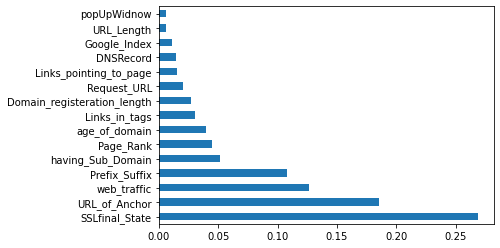

In [28]:
print(model.feature_importances_)
col_imp = pd.Series(model.feature_importances_, index=X.columns)
col_imp.nlargest(15).plot(kind='barh')
plt.show()

Here Columns like **'Prefix_Suffix'**, **'web_traffic'**, **'URL_of_Anchor'** and **'SSLfinal_State'** are more important for our outcome. Hence, We are taking these 4 Columns.

In [15]:
X_sel = X[['Prefix_Suffix','web_traffic','URL_of_Anchor','SSLfinal_State']]

In [34]:
X_sel.head()

,Prefix_Suffix,web_traffic,URL_of_Anchor,SSLfinal_State
0,-1,-1,-1,-1
1,-1,0,0,1
2,-1,1,0,-1
3,-1,1,0,-1
4,-1,0,0,1


## Model Selection & Creation
### 1. RandomForestClassifier:

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [38]:
RFC_classifier = RandomForestClassifier() 

#### Applying Cross-Validation

In [39]:
print(cross_val_score(RFC_classifier, X_sel, y, scoring='accuracy', cv = 10))
Accuracy = cross_val_score(RFC_classifier, X_sel, y, scoring='accuracy', cv = 10).mean()*100
print("\n AVG. Accuracy for RandomForestClassifier is: ",Accuracy)

[0.92276423 0.92682927 0.91869919 0.94308943 0.94715447 0.91869919
 0.93469388 0.96326531 0.95918367 0.93061224]

 AVG. Accuracy for RandomForestClassifier is:  93.6499087439854


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sel, y, test_size=0.25, random_state=42)

In [41]:
# Fitting the Model
RFC_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [42]:
# Predicting from X_test
y_pred = RFC_classifier.predict(X_test)

In [43]:
# Calculating Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

[[326  21]
 [ 13 254]]
0.9446254071661238


In [281]:
import pickle
pickle.dump(RFC_classifier,open('model.pkl','wb'))

### 2. DecisionTree:

In [272]:
from sklearn import tree
DEC_classifier = tree.DecisionTreeClassifier()

#### Applying Cross-Validation

In [273]:
print(cross_val_score(DEC_classifier, X_sel, y, scoring='accuracy', cv = 10))
Accuracy = cross_val_score(DEC_classifier, X_sel, y, scoring='accuracy', cv = 10).mean()*100
print("\n AVG. Accuracy for DecisionTree is: ",Accuracy)

[0.92276423 0.92682927 0.91869919 0.94308943 0.94715447 0.91869919
 0.93469388 0.96326531 0.95918367 0.93061224]

 AVG. Accuracy for DecisionTree is:  93.6499087439854


In [274]:
# Model
DEC_classifier.fit(X_train,y_train)
y_pred = DEC_classifier.predict(X_test)

# Calculating Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

[[326  21]
 [ 13 254]]
0.9446254071661238


### 3. KNN:

In [62]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier()

#### Applying Cross-Validation

In [63]:
print(cross_val_score(KNN_classifier, X_sel, y, scoring='accuracy', cv = 10))
Accuracy = cross_val_score(KNN_classifier, X_sel, y, scoring='accuracy', cv = 10).mean()*100
print("\n AVG. Accuracy for KNN is: ",Accuracy)

[0.91869919 0.92682927 0.91463415 0.95121951 0.94715447 0.91869919
 0.91428571 0.91836735 0.95918367 0.91428571]

 AVG. Accuracy for KNN is:  92.83358221337316


In [160]:
# Model
KNN_classifier.fit(X_train,y_train)
y_pred = KNN_classifier.predict(X_test)

# Calculating Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

[[336  11]
 [ 35 232]]
0.9250814332247557


### 4. SVM:

In [161]:
from sklearn import svm
SVC_classifier = svm.SVC()

#### Applying Cross-Validation

In [162]:
print(cross_val_score(SVC_classifier, X_sel, y, scoring='accuracy', cv = 10))
Accuracy = cross_val_score(SVC_classifier, X_sel, y, scoring='accuracy', cv = 10).mean()*100
print("\n AVG. Accuracy for SVM is: ",Accuracy)

[0.92276423 0.92682927 0.91463415 0.94308943 0.94715447 0.91869919
 0.93061224 0.96326531 0.95918367 0.93061224]

 AVG. Accuracy for SVM is:  93.56844201095073


In [163]:
# Model
KNN_classifier.fit(X_train,y_train)
y_pred = KNN_classifier.predict(X_test)

# Calculating Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

[[336  11]
 [ 35 232]]
0.9250814332247557


### 5. LogisticRegression:

In [167]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression()

#### Applying Cross-Validation

In [168]:
print(cross_val_score(LR_classifier, X_sel, y, scoring='accuracy', cv = 10))
Accuracy = cross_val_score(LR_classifier, X_sel, y, scoring='accuracy', cv = 10).mean()*100
print("\n AVG. Accuracy for LogisticRegression is: ",Accuracy)

[0.91869919 0.92682927 0.91463415 0.93495935 0.94308943 0.91869919
 0.93469388 0.95102041 0.95510204 0.92653061]

 AVG. Accuracy for LogisticRegression is:  93.24257507881202


In [169]:
# Model
LR_classifier.fit(X_train,y_train)
y_pred = LR_classifier.predict(X_test)

# Calculating Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

[[325  22]
 [ 14 253]]
0.9413680781758957


### 6. Naive Bays:

In [170]:
from sklearn.naive_bayes import GaussianNB
NB_classifier = GaussianNB()

#### Applying Cross-Validation

In [171]:
print(cross_val_score(NB_classifier, X_sel, y, scoring='accuracy', cv = 10))
Accuracy = cross_val_score(NB_classifier, X_sel, y, scoring='accuracy', cv = 10).mean()*100
print("\n AVG. Accuracy for LogisticRegression is: ",Accuracy)

[0.88617886 0.92276423 0.91869919 0.91869919 0.90243902 0.91463415
 0.92244898 0.91836735 0.92653061 0.92244898]

 AVG. Accuracy for LogisticRegression is:  91.53210552513687


In [172]:
# Model
NB_classifier.fit(X_train,y_train)
y_pred = NB_classifier.predict(X_test)

# Calculating Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

[[326  21]
 [ 32 235]]
0.9136807817589576


### 7. ANN

In [267]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

# Initialising the ANN
ANN_classifier = Sequential()

# Adding the input layer and the first hidden layer
ANN_classifier.add(Dense(output_dim = 12, init = 'he_uniform',activation='relu',input_dim = 4))
ANN_classifier.add(Dropout(0.4))

# Adding the second hidden layer
ANN_classifier.add(Dense(output_dim = 8, init = 'he_uniform',activation='relu'))
ANN_classifier.add(Dropout(0.5))

#Adding Third Layer
ANN_classifier.add(Dense(output_dim = 3, init = 'he_uniform',activation='relu'))
ANN_classifier.add(Dropout(0.2))

# Adding the output layer
ANN_classifier.add(Dense(output_dim = 1, init = 'he_uniform', activation = 'sigmoid'))

# Compiling the ANN
ANN_classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=ANN_classifier.fit(X_train, y_train,validation_split=0.30, batch_size = 30, nb_epoch = 150)

C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=4, units=12, kernel_initializer="he_uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=8, kernel_initializer="he_uniform")`
  from ipykernel import kernelapp as app
C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=3, kernel_initializer="he_uniform")`
C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="he_uniform")`
C:\Users\Manthan\Anaconda3\e

Train on 1289 samples, validate on 553 samples
Epoch 1/150
1289/1289 [==============================] - 0s 251us/step - loss: 0.7619 - accuracy: 0.5361 - val_loss: 0.6173 - val_accuracy: 0.5714
Epoch 2/150
1289/1289 [==============================] - 0s 66us/step - loss: 0.6892 - accuracy: 0.5904 - val_loss: 0.5727 - val_accuracy: 0.7233
Epoch 3/150
1289/1289 [==============================] - 0s 61us/step - loss: 0.6420 - accuracy: 0.6431 - val_loss: 0.5257 - val_accuracy: 0.8499
Epoch 4/150
1289/1289 [==============================] - 0s 63us/step - loss: 0.6168 - accuracy: 0.6819 - val_loss: 0.4936 - val_accuracy: 0.8897
Epoch 5/150
1289/1289 [==============================] - 0s 65us/step - loss: 0.5965 - accuracy: 0.6866 - val_loss: 0.4595 - val_accuracy: 0.8915
Epoch 6/150
1289/1289 [==============================] - 0s 68us/step - loss: 0.5750 - accuracy: 0.7161 - val_loss: 0.4295 - val_accuracy: 0.9060
Epoch 7/150
1289/1289 [==============================] - 0s 74us/step - loss

1289/1289 [==============================] - 0s 99us/step - loss: 0.2825 - accuracy: 0.8922 - val_loss: 0.1702 - val_accuracy: 0.9132
Epoch 112/150
1289/1289 [==============================] - 0s 93us/step - loss: 0.2948 - accuracy: 0.8836 - val_loss: 0.1692 - val_accuracy: 0.9132
Epoch 113/150
1289/1289 [==============================] - 0s 93us/step - loss: 0.2698 - accuracy: 0.8836 - val_loss: 0.1701 - val_accuracy: 0.9132
Epoch 114/150
1289/1289 [==============================] - 0s 99us/step - loss: 0.2943 - accuracy: 0.8743 - val_loss: 0.1718 - val_accuracy: 0.9132
Epoch 115/150
1289/1289 [==============================] - 0s 90us/step - loss: 0.2765 - accuracy: 0.8914 - val_loss: 0.1712 - val_accuracy: 0.9132
Epoch 116/150
1289/1289 [==============================] - 0s 94us/step - loss: 0.2851 - accuracy: 0.8844 - val_loss: 0.1734 - val_accuracy: 0.9150
Epoch 117/150
1289/1289 [==============================] - 0s 90us/step - loss: 0.2743 - accuracy: 0.8945 - val_loss: 0.1749 -

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


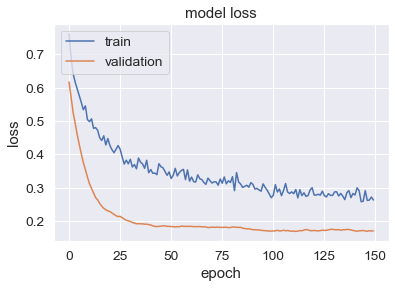

In [268]:
print(model_history.history.keys())
# "Loss"
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [269]:
y_pred = ANN_classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

0.9413680781758957


## Our Algorithms and their Accuracy:
***

| No |  **Algorithms** | **Accuracy** |
| --- | ---- | ---- |
| 1 | RandomForestClassifier | 94.46% |
| 2 | Decision Tree | 94.46% |
| 3 | ANN | 94.13% |
| 4 | KNN | 92.5% |
| 5 | SVM | 92.5% |
| 6 | Naive Bayes | 91.3% |
| 7 | Logistic Regression | 92.13% |

***
